In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sigmoid(X):
    y = 1 / (1 + np.exp(-X))
    return y

In [24]:
X = np.linspace(-100, 100, 200)

In [25]:
k = 1 / (1 + np.exp(-X))

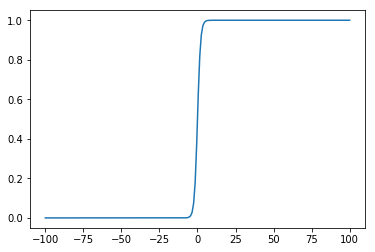

In [26]:
plt.plot(X, sigmoid(X))

In [27]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [55]:
X, y = make_blobs(centers=2, random_state=42)

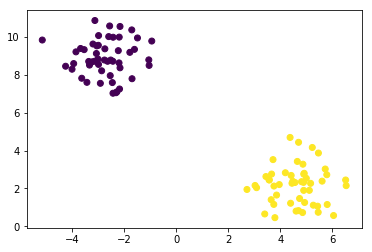

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [30]:
model = LogisticRegression()

In [37]:
model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
model.intercept_

array([-3.98821934, -1.27601734, -0.46895235, -4.02761111, -1.45528081])

In [39]:
colors = ["red", "green", "yellow", "black", "blue"]

In [40]:
y_col = [colors[item] for item in y]

In [41]:
X1 = np.linspace(-10, 10, 2)

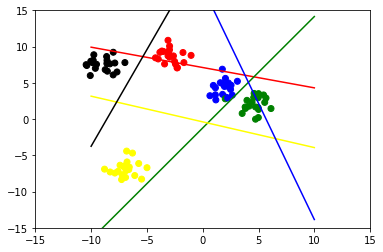

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y_col)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
for index, (coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
    X2 = -X1*coef[0]/coef[1] - intercept/coef[1]
    plt.plot(X1, X2, color=colors[index])

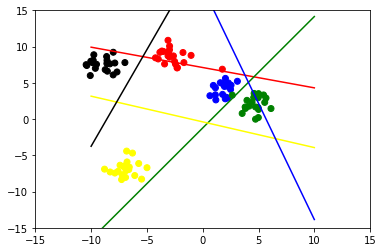

In [53]:
y_p = model.predict(X)
p_color = [colors[item] for item in y_p]

plt.scatter(X[:, 0], X[:, 1], c=p_color)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
for index, (coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
    X2 = -X1*coef[0]/coef[1] - intercept/coef[1]
    plt.plot(X1, X2, color=colors[index])

In [43]:
model.predict_proba(X).argmax(axis=1)

array([2, 4, 0, 4, 3, 2, 1, 1, 1, 0, 0, 2, 4, 0, 1, 3, 4, 4, 2, 3, 3, 1,
       0, 2, 3, 3, 4, 4, 4, 1, 2, 3, 4, 4, 4, 3, 0, 0, 0, 1, 2, 1, 1, 1,
       3, 0, 0, 2, 3, 4, 4, 1, 1, 2, 1, 3, 4, 4, 0, 0, 1, 0, 3, 2, 3, 2,
       4, 4, 2, 0, 3, 2, 2, 2, 1, 3, 1, 3, 4, 2, 4, 2, 3, 1, 3, 0, 3, 0,
       0, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 1])

In [44]:
model.predict(X)

array([2, 4, 0, 4, 3, 2, 1, 1, 1, 0, 0, 2, 4, 0, 1, 3, 4, 4, 2, 3, 3, 1,
       0, 2, 3, 3, 4, 4, 4, 1, 2, 3, 4, 4, 4, 3, 0, 0, 0, 1, 2, 1, 1, 1,
       3, 0, 0, 2, 3, 4, 4, 1, 1, 2, 1, 3, 4, 4, 0, 0, 1, 0, 3, 2, 3, 2,
       4, 4, 2, 0, 3, 2, 2, 2, 1, 3, 1, 3, 4, 2, 4, 2, 3, 1, 3, 0, 3, 0,
       0, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 1])

In [64]:
model.score(X, y)

0.97

array([], shape=(0, 100, 2), dtype=float64)

In [49]:
blue = X[y == 4]

In [50]:
blue

array([[2.03530213, 5.61498563],
       [0.64463087, 3.22362652],
       [1.17550652, 2.64660433],
       [1.57578528, 5.01785035],
       [0.95140774, 4.64392397],
       [2.08050895, 3.01848126],
       [1.13278581, 3.34564127],
       [2.19548116, 4.54676894],
       [1.77691212, 3.40771539],
       [1.1384428 , 4.31517666],
       [3.10535148, 5.21525361],
       [1.79883745, 4.87545205],
       [2.29899103, 4.9886348 ],
       [2.23639398, 2.91571278],
       [2.49553786, 4.08862264],
       [2.3800876 , 4.72223608],
       [1.7576434 , 6.88162072],
       [2.64796758, 3.304294  ],
       [1.94519853, 4.50260353],
       [2.5373355 , 4.67523751]])

In [48]:
model.predict(blue)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4])

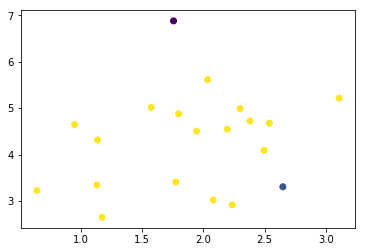

In [52]:
plt.scatter(blue[:,0], blue[:,1], c=model.predict(blue))

In [103]:
class LogisticRegCustom:
    
    def __init__(self, lr=.1, max_iter=20):
        
        self.lr = lr
        self.max_iter = max_iter
        
    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        self.n_features = X.shape[1]
        
        self.coef_ = np.random.randn(self.n_features)
        self.intercept_ = np.random.random()
        
        lls = []
        for i in range(self.max_iter):
            self.gradient_dencend()
            lls.append(self.ll())
#             print(self.coef_, self.intercept_)
        
        return lls
            
    def gradient_dencend(self):
        
        d_coef, d_intercept = self.gradient()
        self.coef_ += d_coef * self.lr
        self.intercept_ += d_intercept * self.lr
    
    def gradient(self):
        yp = self.hypothesis(self._X)
        
        d_coef = np.dot((yp - self._y).T ,self._X) / len(self._X)
        d_intercept = ((yp - self._y)).mean()
        
        return d_coef.flatten(), d_intercept
        
    def hypothesis(self, X):
        g =  np.sum(self.coef_ * X, axis=1, keepdims=True) + self.intercept_
        return 1 / (1 + np.exp(-g))
        
    def predict(self, X):
        return (self.hypothesis(X).flatten() < .5).astype(int)
    
    def ll(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean()
    
    
        

In [104]:
model = LogisticRegCustom(max_iter=100)

In [105]:
model.fit(X, y)

[0.9595175522232299,
 0.9738676073929368,
 0.9819657375084987,
 0.9868941288935537,
 0.990057267271099,
 0.9921695683705335,
 0.9936237212220778,
 0.9946500535007567,
 0.99539050452613,
 0.9959357482881341,
 0.9963452614198353,
 0.9966588604451142,
 0.9969036520681801,
 0.997098365343617,
 0.9972561198441835,
 0.9973862278050026,
 0.9974953848844064,
 0.9975884668859983,
 0.99766906888363,
 0.9977398739505406,
 0.9978029080016835,
 0.9978597177843889,
 0.9979114965263478,
 0.9979591736035337,
 0.9980034792432274,
 0.998044991738033,
 0.9980841722862986,
 0.9981213909885224,
 0.9981569464561436,
 0.9981910807576017,
 0.9982239909241437,
 0.9982558378901739,
 0.9982867535003561,
 0.9983168460450221,
 0.9983462046643092,
 0.9983749028747008,
 0.9984030014089157,
 0.998430550514307,
 0.9984575918211689,
 0.9984841598672207,
 0.9985102833456326,
 0.998535986129624,
 0.9985612881156637,
 0.9985862059188116,
 0.9986107534471219,
 0.9986349423768184,
 0.9986587825458473,
 0.9986822822801278,
 

In [106]:
model.predict(X[:10])

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [107]:
y[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])